In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Stillinger Weber space

The idea is to the span the whole stillinger weber space and calculate different parameters wherever possible. This dataset will then be used to tune a potential later on.

The parameters that would be varied are $\epsilon$, $\sigma$, $a$ and $\lambda$. The possible ranges for these parameters were identified based on existing literature.
The range are `0.5-2.5`, `0.5-3.0`, `1.0-6.0` and `0-33` respectively. $\lambda$ could further be increased.

A sample stillineger weber file

```
# format of a single entry (one or more lines):
#   element 1, element 2, element 3, 
#   epsilon, sigma, a, lambda, gamma, costheta0, A, B, p, q, tol

# Here are the original parameters in metal units, for Silicon from:
#
# Stillinger and Weber,  Phys. Rev. B, v. 31, p. 5262, (1985)
#

Si Si Si 2.1683  2.0951  1.80  21.0  1.20  -0.333333333333
         7.049556277  0.6022245584  4.0  0.0 0.0
```

## Analysing the space

In [140]:
df = pd.read_hdf("data_set_5.hdf")

In [141]:
dfs = df.fillna(20000)

In [142]:
efcc = np.array(dfs["Efcc"])
ebcc = np.array(dfs["Ebcc"])
edia = np.array(dfs["Edia"])

In [143]:
sigma = dfs['sigma']
lmbda = dfs['lambda']

Set E values to zero whenever required

In [113]:
for i in range(len(efcc)):
    if efcc[i] < -10 or efcc[i] > 10:
        efcc[i] = -11
    if ebcc[i] < -10 or ebcc[i] > 10:
        ebcc[i] = -11
    if edia[i] < -10 or edia[i] > 10:
        edia[i] = -11

Assign stable regions

In [146]:
labels = []
for i in range(len(efcc)):
    minE = ebcc[i]
    label = 0
    if efcc[i] < minE:
        minE = efcc[i]
        label = 1
    if edia[i] < minE:
        minE = edia[i]
        label = 2
    #if minE != -11:
    labels.append(label)
    #else:
    #    labels.append(5)

In [147]:
for i in range(len(efcc)):
    if labels[i] == 0:
        efcc[i] = 20000
        edia[i] = 20000
    elif labels[i] == 1:
        ebcc[i] = 20000
        edia[i] = 20000
    elif labels[i] == 2:
        efcc[i] = 20000
        ebcc[i] = 20000
    else:
        efcc[i] = 20000
        ebcc[i] = 20000
        edia[i] = 20000

In [162]:
max(efcc)

20000.0

In [150]:
sigma = np.array(sigma).reshape((50,50))
lmbda = np.array(lmbda).reshape((50,50))

In [151]:
edfcc = np.array(efcc).reshape((50,50))
edbcc = np.array(ebcc).reshape((50,50))
eddia = np.array(edia).reshape((50,50))

In [152]:
labelss = np.array(labels).reshape((50,50))

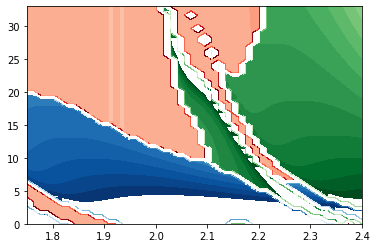

In [167]:
plt.contourf(sigma, lmbda, edfcc, levels=np.arange(-10, 10, 1), cmap='Blues_r')
plt.contourf(sigma, lmbda, eddia, levels=np.arange(-10, 10, 1), cmap='Reds')
plt.contourf(sigma, lmbda, edbcc, levels=np.arange(-10, 10, 1), cmap='Greens_r')
#plt.contourf(sigma, lmbda, edia)